In [28]:
# !/usr/bin/env python

# [Future imports]
# "print" function compatibility between Python 2.x and 3.x
from __future__ import print_function
# Use Python 3.x "/" for division in Pyhton 2.x
from __future__ import division

# General Python
import sys
import os
sys.path.append('./')
# Data structures
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
dpi = 200
mpl.rc("savefig", dpi=dpi)
%matplotlib inline
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy import stats
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import seaborn as sns
import math
import re

from lmfit import minimize, Parameters, report_fit
from matplotlib.colors import LogNorm

#additional imports
import pandas as pd
from Bio import SeqIO, SeqRecord,Seq
import mkl_random
import random

import os
import subprocess
from Bio import Entrez, SeqIO
from copy import deepcopy
from pathlib import Path

import datetime
import time
import json
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


import seaborn as sb

In [29]:
#First workup data for plate 1-13 only
# let's list the files that are in a directory of interest
dirName_SpAP = '/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/spap_egfp_alignment_stats/20201222_SU011_MJA_1-13_trimmed_merged_mapped_reads_with_R1_R2_samstats'
dirName_purexp = '/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/plasmid_alignment_stats/20201222_SU011_MJA_1-13_trimmed_merged_mapped_reads_with_R1_R2_samstats_plasmid'
dirName_ecoli = '/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/ecoli_alignment_stats/20201222_SU011_MJA_1-13_trimmed_merged_mapped_reads_with_R1_R2_samstats_ecoli'

#generate list of files in directory
file_SpAP = os.listdir(dirName_SpAP)
file_purexp = os.listdir(dirName_purexp)
file_ecoli = os.listdir(dirName_ecoli)

In [4]:
#First workup data for plate 14 only
# let's list the files that are in a directory of interest
dirName_SpAP = '/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/spap_egfp_alignment_stats/20201219_SU012_MJA_14_trimmed_merged_mapped_reads_with_R1_R2_samstats'
dirName_purexp = '/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/plasmid_alignment_stats/20201219_SU012_MJA_14_trimmed_merged_mapped_reads_with_R1_R2_samstats_plasmid'
dirName_ecoli = '/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/ecoli_alignment_stats/20201219_SU012_MJA_14_trimmed_merged_mapped_reads_with_R1_R2_samstats_ecoli'

#generate list of files in directory
file_SpAP = os.listdir(dirName_SpAP)
file_purexp = os.listdir(dirName_purexp)
file_ecoli = os.listdir(dirName_ecoli)

In [30]:
#use this cell to parse samtools stats data file by line references (SPAP)
dataD = {}
expt_stats_spap = pd.DataFrame()


####specify directory and list of files here
dirName=dirName_SpAP

fileList=file_SpAP


#create lists to store total and mapped reads & barcodes
sample_name = []
total_sequences=[]
mapped_reads =[]
i7_barcode=[]
i5_barcode=[]
sample_ID=[]
# genome_ID=[]

for a in fileList:
    #get file name without extension
    name=a.split('.')
    
    #store sample name in file_name list
    sample_name.append(name[0])
   
    #pull out i7+i5 and store to lists
    i7=(name[0].split('-'))[3]
    i7_barcode.append(i7)
   
    i5=((name[0].split('-'))[7]).split('_')[0]
    i5_barcode.append(i5)
    

    #pull out sample ID (this is a BC identifier provided for each library)
    sampleID=((name[0].split('-'))[7]).split('_')[1]
    sample_ID.append(sampleID)   
    
    # open each file
    f = open(dirName + '/'+a,'r')
    #split file into lines to reference desired lines
    content = f.readlines()
    
    #get total reads in file & store to total_sequences list
    total_line=(content[9]).split('\t')
    total_quant=int(total_line[2])
    total_sequences.append(total_quant)
    
    #get mapped reads in file & store to mapped reads list
    mapped_line=(content[13]).split('\t')
    mapped_quant=int(mapped_line[2])
    mapped_reads.append(mapped_quant)
    
#add stats to dataframe columns    
expt_stats_spap['Sample_full_name'] = sample_name
expt_stats_spap['Sample_ID'] = sample_ID
expt_stats_spap['i7'] = i7_barcode
expt_stats_spap['i5'] = i5_barcode
expt_stats_spap['Total_reads'] = total_sequences
expt_stats_spap['Mapped_reads_spap'] = mapped_reads
expt_stats_spap.set_index('Sample_ID', inplace=True)

expt_stats_spap.head()
expt_stats_spap.sort_values('Total_reads')
len(expt_stats_spap) #4645 samples, out of 4992 theoretical

4646

In [31]:
#use this cell to parse samtools stats data file by line references (Full plasmid)
dataD = {}
expt_stats_purexp = pd.DataFrame()


####specify directory and list of files here
dirName=dirName_purexp

fileList=file_purexp


#create lists to store total and mapped reads & barcodes
sample_name = []
total_sequences=[]
mapped_reads =[]
i7_barcode=[]
i5_barcode=[]
sample_ID=[]
# genome_ID=[]

for a in fileList:
    #get file name without extension
    name=a.split('.')
    
    #store sample name in file_name list
    sample_name.append(name[0])
   
    #pull out i7+i5 and store to lists
    i7=(name[0].split('-'))[3]
    i7_barcode.append(i7)
   
    i5=((name[0].split('-'))[7]).split('_')[0]
    i5_barcode.append(i5)
    

    #pull out sample ID (this is a BC identifier provided for each library)
    sampleID=((name[0].split('-'))[7]).split('_')[1]
    sample_ID.append(sampleID)   
    
    # open each file
    f = open(dirName + '/'+a,'r')
    #split file into lines to reference desired lines
    content = f.readlines()
    
    #get total reads in file & store to total_sequences list
    total_line=(content[9]).split('\t')
    total_quant=int(total_line[2])
    total_sequences.append(total_quant)
    
    #get mapped reads in file & store to mapped reads list
    mapped_line=(content[13]).split('\t')
    mapped_quant=int(mapped_line[2])
    mapped_reads.append(mapped_quant)
    
#add stats to dataframe columns    
expt_stats_purexp['Sample_full_name'] = sample_name
expt_stats_purexp['Sample_ID'] = sample_ID
expt_stats_purexp['i7'] = i7_barcode
expt_stats_purexp['i5'] = i5_barcode
expt_stats_purexp['Total_reads'] = total_sequences
expt_stats_purexp['Mapped_reads_purexp'] = mapped_reads
expt_stats_purexp.set_index('Sample_ID', inplace=True)

expt_stats_purexp.head()
expt_stats_purexp.sort_values('Total_reads')
len(expt_stats_purexp) # samples, out of  theoretical

4646

In [32]:
#use this cell to parse samtools stats data file by line references (E coli)
dataD = {}
expt_stats_ecoli = pd.DataFrame()


####specify directory and list of files here
dirName=dirName_ecoli

fileList=file_ecoli


#create lists to store total and mapped reads & barcodes
sample_name = []
total_sequences=[]
mapped_reads =[]
i7_barcode=[]
i5_barcode=[]
sample_ID=[]
# genome_ID=[]

for a in fileList:
    #get file name without extension
    name=a.split('.')
    
    #store sample name in file_name list
    sample_name.append(name[0])
   
    #pull out i7+i5 and store to lists
    i7=(name[0].split('-'))[3]
    i7_barcode.append(i7)
   
    i5=((name[0].split('-'))[7]).split('_')[0]
    i5_barcode.append(i5)
    

    #pull out sample ID (this is a BC identifier provided for each library)
    sampleID=((name[0].split('-'))[7]).split('_')[1]
    sample_ID.append(sampleID)   
    
    # open each file
    f = open(dirName + '/'+a,'r')
    #split file into lines to reference desired lines
    content = f.readlines()
    
    #get total reads in file & store to total_sequences list
    total_line=(content[9]).split('\t')
    total_quant=int(total_line[2])
    total_sequences.append(total_quant)
    
    #get mapped reads in file & store to mapped reads list
    mapped_line=(content[13]).split('\t')
    mapped_quant=int(mapped_line[2])
    mapped_reads.append(mapped_quant)
    
#add stats to dataframe columns    
expt_stats_ecoli['Sample_full_name'] = sample_name
expt_stats_ecoli['Sample_ID'] = sample_ID
expt_stats_ecoli['i7'] = i7_barcode
expt_stats_ecoli['i5'] = i5_barcode
expt_stats_ecoli['Total_reads'] = total_sequences
expt_stats_ecoli['Mapped_reads_ecoli'] = mapped_reads
expt_stats_ecoli.set_index('Sample_ID', inplace=True)

expt_stats_ecoli.head()
expt_stats_ecoli.sort_values('Total_reads')
len(expt_stats_ecoli) # samples, out of  theoretical

4646

In [33]:
#use this cell to join the above dataframes on the index
plates1to13_stats = expt_stats_spap.join(expt_stats_ecoli, rsuffix='_ecoli')
plates1to13_stats = plates1to13_stats.join(expt_stats_purexp, rsuffix='purexp')


#create new dataframe without duplicate columns
selected_columns = plates1to13_stats[["Sample_full_name","i7","i5", "Total_reads", "Mapped_reads_spap", "Mapped_reads_purexp", "Mapped_reads_ecoli"]]
plates1to13_stats_select= selected_columns.copy()


#verify that number of unique i7 barcodes is equal to number of dataframe entries
if (plates1to13_stats_select.i7.nunique() == len(plates1to13_stats_select)):
    print("i7 True")
else:
    print("i7 False")
    
#verify that number of unique i5 barcodes is equal to number of dataframe entries
if (plates1to13_stats_select.i5.nunique() == len(plates1to13_stats_select)):
    print("i5 True")
else:
    print("i5 False")
    
    
plates1to13_stats_select
    
    
# #repeat for plate 7
# plate7_stats = expt_stats_spap_plate7.join(expt_stats_ecoli_plate7, rsuffix='_ecoli')
# plate7_stats = plate7_stats.join(expt_stats_purexp_plate7, rsuffix='purexp')


# #create new dataframe without duplicate columns
# selected_columns_plate7 = plate7_stats[["Sample_full_name","i7","i5", "Total_reads", "Mapped_reads_spap", "Mapped_reads_purexp", "Mapped_reads_ecoli"]]
# plate7_stats_select= selected_columns_plate7.copy()


# #verify that number of unique i7 barcodes is equal to number of dataframe entries
# if (plate7_stats_select.i7.nunique() == len(plate7_stats_select)):
#     print("i7 True (plate 7)")
# else:
#     print("i7 False(plate 7)")
    
# #verify that number of unique i5 barcodes is equal to number of dataframe entries
# if (plate7_stats_select.i5.nunique() == len(plate7_stats_select)):
#     print("i5 True (plate 7)")
# else:
#     print("i5 False (plate 7)")
      
# plate7_stats_select.head()

i7 True
i5 True


,Sample_full_name,i7,i5,Total_reads,Mapped_reads_spap,Mapped_reads_purexp,Mapped_reads_ecoli
Sample_ID,,,,,,,
S1386,CZB-NXT-i7-02153-CZB-NXT-i5-01769_S1386_L001_s...,02153,01769,10997,10574,10768,11
S1884,CZB-NXT-i7-03803-CZB-NXT-i5-03419_S1884_L001_s...,03803,03419,5169,4746,4883,0
S2353,CZB-NXT-i7-04272-CZB-NXT-i5-03888_S2353_L001_s...,04272,03888,1175,907,958,59
S4104,CZB-NXT-i7-06791-CZB-NXT-i5-06407_S4104_L001_s...,06791,06407,9862,9535,9724,4
S2373,CZB-NXT-i7-04292-CZB-NXT-i5-03908_S2373_L001_s...,04292,03908,149,115,129,0
...,...,...,...,...,...,...,...
S3453,CZB-NXT-i7-05372-CZB-NXT-i5-04988_S3453_L001_s...,05372,04988,218,16,19,1
S2841,CZB-NXT-i7-04760-CZB-NXT-i5-04376_S2841_L001_s...,04760,04376,16355,15799,16057,10
S4454,CZB-NXT-i7-07141-CZB-NXT-i5-06757_S4454_L001_s...,07141,06757,2162,2046,2101,0


In [34]:
#calculate fraction of mapped reads for each genome and add as new dataframe column
frac_spap=[]
frac_purexp=[]
frac_ecoli=[]
frac_unmapped=[]

for keys, values in plates1to13_stats_select.iterrows():
    if values.Total_reads > 0:
        fraction_spap= round(values.Mapped_reads_spap/values.Total_reads,2)
        frac_spap.append(fraction_spap)
        
        
        fraction_purexp= round(values.Mapped_reads_purexp/values.Total_reads,2)
        frac_purexp.append(fraction_purexp)
        
        fraction_ecoli= round(values.Mapped_reads_ecoli/values.Total_reads,2)
        frac_ecoli.append(fraction_ecoli)
        
        fraction_unmapped=round((values.Total_reads-values.Mapped_reads_purexp-values.Mapped_reads_ecoli)/values.Total_reads,2)
        frac_unmapped.append(fraction_unmapped)
    else:
        frac_spap.append(0)
        frac_purexp.append(0)
        frac_ecoli.append(0)
        frac_unmapped.append(0)

#add read fraction of reads to summary dataframe
plates1to13_stats_select['Frac_spap_reads']=frac_spap
plates1to13_stats_select['Frac_purex+spap_reads']=frac_purexp
plates1to13_stats_select['Frac_ecoli_reads']=frac_ecoli
plates1to13_stats_select['Frac_unmapped']=frac_unmapped

In [35]:
#export data at this stage to csv
plates1to13_stats_select.to_csv ('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210531_plates_1-13_read_stats_allgenomes.csv')

## Import barcode/plate/well key and assign to samples in summary dataframe

In [36]:
##import summary csvs from above

##plates 1-13
plates1to13_df=pd.read_csv ('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210531_plates_1-13_read_stats_allgenomes.csv')

##plate 14
plate14_df=pd.read_csv ('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210531_plates_14_read_stats_allgenomes.csv')


##import csv containing i7/i5 barcodes, experimental plate number, and wells
##plates 1-13
barcode_key1to13=pd.read_csv('/Users/mja/Appel_MutSequencing/Barcodes/20201212_MJA_1-13_plate_well_key.csv')
##plates 14
barcode_key14=pd.read_csv('/Users/mja/Appel_MutSequencing/Barcodes/20201212_MJA_14_plate_well_key.csv')

#select only plates 1-13 (since 14 contains duplicate barcodes and was sequenced separately)
plates1to13_barcodes=barcode_key1to13.loc[barcode_key1to13['plate'].isin(range(1,14))]
plates1to13_barcodes_i7_only=plates1to13_barcodes[['i7','plate','well']].copy()

#select barcodes for plate 7 only
barcodes14=barcode_key14.loc[barcode_key14['plate'] == 14]
plates14_barcodes_i7_only=barcodes14[['i7','plate','well']].copy()

##merge plate1-13 barcode list with summary dataframe
plates1to13_df_wells = pd.merge(left=plates1to13_df, right=plates1to13_barcodes_i7_only, left_on='i7', right_on='i7')

##repeat for plate 14
plate14_df_wells = pd.merge(left=plate14_df, right=plates14_barcodes_i7_only, left_on='i7', right_on='i7')



#export merged dataframes
##plates 1-13
plates1to13_df_wells.to_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210531_plates_1-13_read_stats_allgenomes_plate_well.csv')
##plates 14
plate14_df_wells.to_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210531_plates_14_read_stats_allgenomes_plate_well.csv')


#all plates
merged_df_wells=pd.concat([plates1to13_df_wells, plate14_df_wells])
merged_df_wells.to_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210531_plates_1-14_read_stats_allgenomes_plate_well.csv')

In [37]:
plates1to13_df_wells.loc[plates1to13_df_wells['i7']==4725]

,Sample_ID,Sample_full_name,i7,i5,Total_reads,Mapped_reads_spap,Mapped_reads_purexp,Mapped_reads_ecoli,Frac_spap_reads,Frac_purex+spap_reads,Frac_ecoli_reads,Frac_unmapped,plate,well
4012,S2806,CZB-NXT-i7-04725-CZB-NXT-i5-04341_S2806_L001_s...,4725,4341,5404,5289,5343,0,0.98,0.99,0.0,0.01,7,117


In [147]:
plates1to13_df_wells['Frac_ecoli_reads'].sort_values()

0       0.00
3032    0.00
3033    0.00
3034    0.00
3035    0.00
        ... 
692     0.38
1597    0.39
2023    0.41
2848    0.44
1443    0.68
Name: Frac_ecoli_reads, Length: 4646, dtype: float64

### Get information for each plate (Table 1, main text)

In [151]:
#drop any entries with 0 reads at this stage
plates1to13_df_wells_1=(plates1to13_df_wells.loc[plates1to13_df_wells['Total_reads']>0]).copy()
#add column calculating plasmid only reads (difference between reads that map to the entire plasmid and reads that map to spap)
plates1to13_df_wells_1['Frac_plasmid_only']=plates1to13_df_wells_1['Frac_purex+spap_reads']-plates1to13_df_wells_1['Frac_spap_reads'];

#list of plates
plateList=np.arange(1,14)

##create empty lists representing desired columns for this table
#col0 plate name list
plateName=[]
#col1, total reads summed across entire plate
totalReadsL=[]
#col2# of BCs with > 0 reads
totalBCsL=[]
#col3 median reads per BC
medianReadsBCL=[]
#col4 Median fraction of SpAP reads
fracSpAPL=[]
#col5 Median fraction of Ecoli reads
fracEcoliL=[]
#col6 Median fraction plasmid reads
fracPlasmidL=[]
#col7 Median fraction unmapped reads
fracUnmapped=[]


####first add summary stats across all plates    
tempDF=plates1to13_df_wells_1.copy()
    
plateName.append('all')
    
#get total reads for entire plate
totalReadsL.append(tempDF['Total_reads'].sum())
#get number of BCs with >0 reads (this is all BCs listed for this plate in this DF)
totalBCsL.append(len(tempDF))
#get median number of reads per barcode for this plate
medianReadsBCL.append(int(tempDF['Total_reads'].median()))
#get median frac of spap reads per barcode for this plate
fracSpAPL.append(round(tempDF['Frac_spap_reads'].median(),2))
#get median frac of ecoli reads per barcode for this plate
fracEcoliL.append(round(tempDF['Frac_ecoli_reads'].median(),2))
#get median frac of plasmid reads per barcode for this plate
fracPlasmidL.append(round(tempDF['Frac_plasmid_only'].median(),2))
#get median frac of unmapped reads per barcode for this plate
fracUnmapped.append(tempDF['Frac_unmapped'].median())
    

####iterate through plates and get stats per sublibrary
for plate in plateList:
    tempDF=plates1to13_df_wells_1.loc[plates1to13_df_wells_1['plate']==plate]
    
    plateName.append(str(plate))
    
    #get total reads for entire plate
    totalReadsL.append(tempDF['Total_reads'].sum())
    #get number of BCs with >0 reads (this is all BCs listed for this plate in this DF)
    totalBCsL.append(len(tempDF))
    #get median number of reads per barcode for this plate
    medianReadsBCL.append(int(tempDF['Total_reads'].median()))
    #get median frac of spap reads per barcode for this plate
    fracSpAPL.append(round(tempDF['Frac_spap_reads'].median(),2))
    #get median frac of ecoli reads per barcode for this plate
    fracEcoliL.append(round(tempDF['Frac_ecoli_reads'].median(),4))
    #get median frac of plasmid reads per barcode for this plate
    fracPlasmidL.append(round(tempDF['Frac_plasmid_only'].median(),2))
    #get median frac of unmapped reads per barcode for this plate
    fracUnmapped.append(tempDF['Frac_unmapped'].median())
    
    #repeat analysis for plate 8, many poor BCs here because appears that PCR failed at
    #amplicon stage. Add additional row where a read threshold of 500 is applied
    if plate == 8:
        plateName.append(str(plate)+'*')
        tempDF_min=plates1to13_df_wells_1.loc[(plates1to13_df_wells_1['plate']==8) &(plates1to13_df_wells_1['Total_reads']>=500)]
        #get total reads for entire plate
        totalReadsL.append(tempDF_min['Total_reads'].sum())
        #get number of BCs with >0 reads (this is all BCs listed for this plate in this DF)
        totalBCsL.append(len(tempDF_min))
        #get median number of reads per barcode for this plate
        medianReadsBCL.append(int(tempDF_min['Total_reads'].median()))
        #get median frac of spap reads per barcode for this plate
        fracSpAPL.append(round(tempDF_min['Frac_spap_reads'].median(),2))
        #get median frac of ecoli reads per barcode for this plate
        fracEcoliL.append(round(tempDF_min['Frac_ecoli_reads'].median(),2))
        #get median frac of plasmid reads per barcode for this plate
        fracPlasmidL.append(round(tempDF_min['Frac_plasmid_only'].median(),2))
        #get median frac of unmapped reads per barcode for this plate
        fracUnmapped.append(tempDF_min['Frac_unmapped'].median())
    else:
        pass

#create new DF and add stats
table1DF=pd.DataFrame(list(zip(plateName, totalReadsL,totalBCsL,medianReadsBCL,fracSpAPL,fracEcoliL,fracPlasmidL,fracUnmapped)),
               columns =['plateName', 'totalReadsL','totalBCsL','medianReadsBCL','fracSpAPL','fracEcoliL','fracPlasmidL','fracUnmapped'])

#export DF
table1DF.to_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210702_plates_1-13_table_1_stats.csv', index=False)

## Get basic summary information for this data section

In [38]:
#Stats for Plates 1-13 only
df_counts=plates1to13_df_wells.copy()
plates="1-13"
total_count=df_counts['Total_reads'].sum()
spap_count=df_counts['Mapped_reads_spap'].sum()
ecoli_count=df_counts['Mapped_reads_ecoli'].sum()
purexp_count=df_counts['Mapped_reads_purexp'].sum()
purexp_non_spap_count=purexp_count-spap_count
unmapped_count=total_count-ecoli_count-purexp_count

print("Plates " +plates+ " Number of barcodes: " + str(len(df_counts)))
print("Plates " +plates+ " total reads: " + str(total_count))
print("Plates " +plates+ " SpAP reads: " + str(spap_count)+ " (" + str(round(((spap_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+ " E. coli reads: " + str(ecoli_count)+ " (" + str(round(((ecoli_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+ " PureExpress full reads: " + str(purexp_count)+ " (" + str(round(((purexp_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+  " PureExpress NON SpAP reads: " + str(purexp_non_spap_count)+ " (" + str(round(((purexp_non_spap_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+  " Unmapped: " + str(unmapped_count)+ " (" + str(round(((unmapped_count/total_count)*100), 2))+ " %)")
print("##########################")

#Stats for Plate 14 only
df_counts=plate14_df_wells.copy()
plates="14"
total_count=df_counts['Total_reads'].sum()
spap_count=df_counts['Mapped_reads_spap'].sum()
ecoli_count=df_counts['Mapped_reads_ecoli'].sum()
purexp_count=df_counts['Mapped_reads_purexp'].sum()
purexp_non_spap_count=purexp_count-spap_count
unmapped_count=total_count-ecoli_count-purexp_count

print("Plates " +plates+ " Number of barcodes: " + str(len(df_counts)))
print("Plates " +plates+ " total reads: " + str(total_count))
print("Plates " +plates+ " SpAP reads: " + str(spap_count)+ " (" + str(round(((spap_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+ " E. coli reads: " + str(ecoli_count)+ " (" + str(round(((ecoli_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+ " PureExpress full reads: " + str(purexp_count)+ " (" + str(round(((purexp_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+  " PureExpress NON SpAP reads: " + str(purexp_non_spap_count)+ " (" + str(round(((purexp_non_spap_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+  " Unmapped: " + str(unmapped_count)+ " (" + str(round(((unmapped_count/total_count)*100), 2))+ " %)")
print("##########################")

#Stats for Plate 1-14 
df_counts=merged_df_wells.copy()
plates="1-14"
total_count=df_counts['Total_reads'].sum()
spap_count=df_counts['Mapped_reads_spap'].sum()
ecoli_count=df_counts['Mapped_reads_ecoli'].sum()
purexp_count=df_counts['Mapped_reads_purexp'].sum()
purexp_non_spap_count=purexp_count-spap_count
unmapped_count=total_count-ecoli_count-purexp_count

print("Plates " +plates+ " Number of barcodes: " + str(len(df_counts)))
print("Plates " +plates+ " total reads: " + str(total_count))
print("Plates " +plates+ " SpAP reads: " + str(spap_count)+ " (" + str(round(((spap_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+ " E. coli reads: " + str(ecoli_count)+ " (" + str(round(((ecoli_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+ " PureExpress full reads: " + str(purexp_count)+ " (" + str(round(((purexp_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+  " PureExpress NON SpAP reads: " + str(purexp_non_spap_count)+ " (" + str(round(((purexp_non_spap_count/total_count)*100), 2))+ " %)")
print("Plates " +plates+  " Unmapped: " + str(unmapped_count)+ " (" + str(round(((unmapped_count/total_count)*100), 2))+ " %)")
print("##########################")





Plates 1-13 Number of barcodes: 4646
Plates 1-13 total reads: 28635517
Plates 1-13 SpAP reads: 27286673 (95.29 %)
Plates 1-13 E. coli reads: 78893 (0.28 %)
Plates 1-13 PureExpress full reads: 27873540 (97.34 %)
Plates 1-13 PureExpress NON SpAP reads: 586867 (2.05 %)
Plates 1-13 Unmapped: 683084 (2.39 %)
##########################
Plates 14 Number of barcodes: 354
Plates 14 total reads: 5162247
Plates 14 SpAP reads: 4973378 (96.34 %)
Plates 14 E. coli reads: 499 (0.01 %)
Plates 14 PureExpress full reads: 5065367 (98.12 %)
Plates 14 PureExpress NON SpAP reads: 91989 (1.78 %)
Plates 14 Unmapped: 96381 (1.87 %)
##########################
Plates 1-14 Number of barcodes: 5000
Plates 1-14 total reads: 33797764
Plates 1-14 SpAP reads: 32260051 (95.45 %)
Plates 1-14 E. coli reads: 79392 (0.23 %)
Plates 1-14 PureExpress full reads: 32938907 (97.46 %)
Plates 1-14 PureExpress NON SpAP reads: 678856 (2.01 %)
Plates 1-14 Unmapped: 779465 (2.31 %)
##########################


## Comparison of paired only vs. all alignments (Plates 1-13 only

In [39]:
#import stats with only paired reads
paired_only = pd.read_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/read_stats/20210531_plates_1-13_read_stats_allgenomes_plate_well.csv')

#with all reads
all_reads = pd.read_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210531_plates_1-13_read_stats_allgenomes_plate_well.csv')

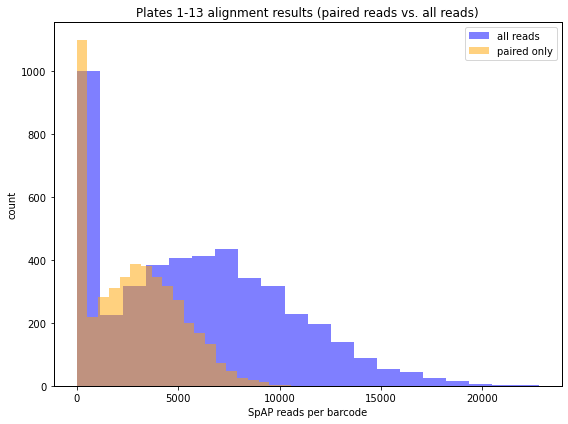

In [40]:
paired_SPAP = paired_only['Mapped_reads_spap'].tolist()
all_SPAP = all_reads['Mapped_reads_spap'].tolist()
#make histogram
plt.figure(figsize=(8,6))
plt.hist(all_SPAP, bins=20, alpha=0.5, color='blue', label="all reads")
plt.hist(paired_SPAP, bins=20, alpha=0.5, color='orange', label="paired only")
plt.legend(loc='upper right')
plt.xlabel("SpAP reads per barcode")
plt.ylabel("count")
plt.title("Plates 1-13 alignment results (paired reads vs. all reads)")
plt.tight_layout()
plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/20210601_plates_1-13_paired_vs_all_spap_reads_hist.png')
plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/20210601_plates_1-13_paired_vs_all_spap_reads_hist.pdf')

## Split summary dataframes into individual plates and export csvs

In [41]:
#specify list of individual plates by plate number
plate_list=range(1,14)

#create empty lists to store dataframes by name
summary_df_list=[]
summary_df_250_list=[]

#export plates 1-13
for i in plate_list:
    temp_df=plates1to13_df_wells.loc[plates1to13_df_wells['plate'] == i]
    print (str(len(temp_df)) + " plate "+str(i)+" samples")
    temp_df.to_csv ('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/per_plate/20210531_plate'+str(i)+'_read_stats_allgenomes_plate_well.csv')
    temp_df.name="plate"+str(i)+"df"
    summary_df_list.append(temp_df)
    
    #also export culled dataframes
    tempdf_250=temp_df.loc[temp_df['Total_reads'] >= 250]
    print (str(len(tempdf_250)) + " plate "+str(i)+" samples >= 250")
    tempdf_250.to_csv ('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/per_plate/20210531_plate'+str(i)+'_read_stats_allgenomes_plate_well_250culled.csv')
    tempdf_250.name="plate"+str(i)+"df_250"
    summary_df_250_list.append(tempdf_250)
  
    
#repeat for plate 14 (all libraries)
plate14_df_wells_summary=plate14_df_wells.loc[plate14_df_wells['plate'] == 14]
print (str(len(plate14_df_wells_summary)) + " plate 14 samples")
plate14_df_wells_summary.to_csv ('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/per_plate/20210531_plate14_read_stats_allgenomes_plate_well.csv')
plate14_df_wells_summary.name="plate"+str(14)+"df"
summary_df_list.append(plate14_df_wells_summary)


#greater than 250 only
plate14_df_wells_summary_250=plate14_df_wells_summary.loc[plate14_df_wells_summary['Total_reads'] >= 250]
print (str(len(plate14_df_wells_summary_250)) + " plate 14 samples >= 250")
plate14_df_wells_summary_250.to_csv ('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/per_plate/20210531_plate14_read_stats_allgenomes_plate_well_250culled.csv')
plate14_df_wells_summary_250.name="plate"+str(14)+"df_250"
summary_df_250_list.append(plate14_df_wells_summary_250)

#samples per plate OLD with only paired reads
# 369 plate 1 samples
# 324 plate 1 samples >= 250
# 371 plate 2 samples
# 279 plate 2 samples >= 250
# 344 plate 3 samples
# 298 plate 3 samples >= 250
# 378 plate 4 samples
# 340 plate 4 samples >= 250
# 383 plate 5 samples
# 262 plate 5 samples >= 250
# 356 plate 6 samples
# 312 plate 6 samples >= 250
# 382 plate 7 samples
# 237 plate 7 samples >= 250
# 377 plate 8 samples
# 304 plate 8 samples >= 250
# 380 plate 9 samples
# 161 plate 9 samples >= 250
# 359 plate 10 samples
# 278 plate 10 samples >= 250
# 384 plate 11 samples
# 370 plate 11 samples >= 250
# 253 plate 12 samples
# 223 plate 12 samples >= 250
# 309 plate 13 samples
# 262 plate 13 samples >= 250
# 354 plate 14 samples
# 346 plate 14 samples >= 250


#new with all paired and unpaired reads
# 369 plate 1 samples
# 347 plate 1 samples >= 250
# 372 plate 2 samples
# 288 plate 2 samples >= 250
# 344 plate 3 samples
# 322 plate 3 samples >= 250
# 383 plate 4 samples
# 264 plate 4 samples >= 250
# 356 plate 5 samples
# 325 plate 5 samples >= 250
# 382 plate 6 samples
# 303 plate 6 samples >= 250
# 377 plate 7 samples
# 316 plate 7 samples >= 250
# 380 plate 8 samples
# 289 plate 8 samples >= 250
# 359 plate 9 samples
# 291 plate 9 samples >= 250
# 378 plate 10 samples
# 347 plate 10 samples >= 250
# 384 plate 11 samples
# 375 plate 11 samples >= 250
# 253 plate 12 samples
# 232 plate 12 samples >= 250
# 309 plate 13 samples
# 281 plate 13 samples >= 250
# 354 plate 14 samples
# 349 plate 14 samples >= 250

369 plate 1 samples
347 plate 1 samples >= 250
372 plate 2 samples
288 plate 2 samples >= 250
344 plate 3 samples
322 plate 3 samples >= 250
383 plate 4 samples
264 plate 4 samples >= 250
356 plate 5 samples
325 plate 5 samples >= 250
382 plate 6 samples
303 plate 6 samples >= 250
377 plate 7 samples
316 plate 7 samples >= 250
380 plate 8 samples
289 plate 8 samples >= 250
359 plate 9 samples
291 plate 9 samples >= 250
384 plate 10 samples
375 plate 10 samples >= 250
378 plate 11 samples
347 plate 11 samples >= 250
253 plate 12 samples
232 plate 12 samples >= 250
309 plate 13 samples
281 plate 13 samples >= 250
354 plate 14 samples
349 plate 14 samples >= 250


## Create histogram showing total reads for each library in all plates and for each plate

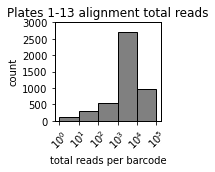

In [42]:
#set the value globally
plt.rcParams['axes.linewidth'] = 1 

#For plates 1-13
total_reads = plates1to13_df_wells['Total_reads'].tolist()
#make histogram
plt.figure(figsize=(2.5,2.5))
plt.hist(total_reads, bins=[1,10,100,1000,10000,100000], color = 'gray', rwidth=1, edgecolor='black')

plt.xlabel("total reads per barcode")
plt.xscale('log')
plt.xticks([1, 10, 100,1000,10000,100000], rotation=45)
plt.yticks(np.arange(0,3500,500), rotation=0)
plt.ylabel("count")
plt.title("Plates 1-13 alignment total reads")
plt.tight_layout()


plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/20210601_plates_1-13_total_reads_hist_logX.png')
plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/20210601_plates_1-13_total_reads_hist_logX.pdf')






#For plates 1-14



In [55]:
plates1to13_df_wells['Total_reads'].median()

5970.5

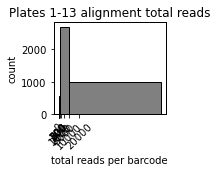

In [24]:
#set the value globally
plt.rcParams['axes.linewidth'] = 1 

#For plates 1-13
total_reads = plates1to13_df_wells['Total_reads'].tolist()
#make histogram
plt.figure(figsize=(2.5,2.5))
plt.hist(total_reads, bins=[0.1,1,10,100,1000,10000,100000], color = 'gray', rwidth=1, edgecolor='black')

plt.xlabel("total reads per barcode")
# plt.xscale('log')
plt.xticks([0,100,200,300,400,500,1000,2000,5000,10000,20000], rotation=45)
# plt.yticks(np.arange(0,3500,500), rotation=0)
plt.ylabel("count")
plt.title("Plates 1-13 alignment total reads")
plt.tight_layout()


# plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/20210601_plates_1-13_total_reads_hist.png')
# plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/20210601_plates_1-13_total_reads_hist.pdf')






#For plates 1-14




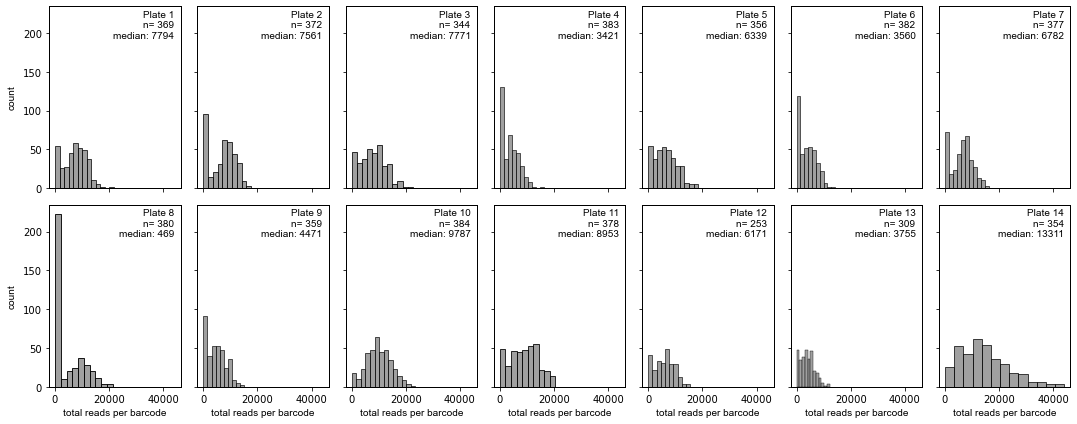

In [52]:
plt.close()
plt.rcParams['axes.linewidth'] = 1 #set the value globally
arialfont= {'fontname':'Arial'}




#use seaborn to make swarmplots here, can reference columns of dataframe directly, and iterate through dataframe

grouped_all = merged_df_wells.reset_index().groupby('plate')

groups = grouped_all.groups.keys()

fig, axs = plt.subplots(2,7,figsize=(15,6), sharex=True, sharey=True)

for index, group in enumerate(groups):
    currentax = axs[index//7, index%7]
    groupdata = grouped_all.get_group(group)
    sb.histplot(x = 'Total_reads', data = groupdata, ax = currentax, alpha=0.75, color='gray').set(xlabel = '', ylabel = '')
#     currentax.set_yscale('log')    

    currentax.set_ylabel('count', fontsize=10, rotation =90, **arialfont)
    currentax.set_xlabel('total reads per barcode', fontsize=10, rotation =0, **arialfont)
    currentax.yaxis.set_label_coords(-0.25,0.5)
#     currentax.set_ylim(1,150)

    #label with plate name
    median_val=(groupdata['Total_reads']).median()
    number_of_BCs=len(groupdata)
    label_name="Plate "+str(group)+ '\n' +"n= "+str(number_of_BCs) +'\n'+ "median: " + str(int(median_val))
    currentax.annotate(label_name, xy=(0.95, 0.98), 
                       xycoords='axes fraction', 
                       fontsize=10,
                       horizontalalignment='right', 
                       verticalalignment='top', **arialfont)
plt.tight_layout()
# plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/20210601_plates_1-14_total_reads_hist.png')
# plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/20210601_plates_1-14_total_reads_hist.pdf')

In [45]:
##Save histograms from dataframes not culled by total reads
list_of_dfs=summary_df_list.copy()
index_list=range(0,len(list_of_dfs))

for i in index_list:

    hist1 = list_of_dfs[i].hist(['Total_reads'],bins=25, grid=False, color='gray',figsize = (8,6), ec='black')
    plt.title('Plate '+str(i+1)+ ' total reads per library', fontsize=14)
    plt.xlabel('Total reads', fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel('count', fontsize=14)
    plt.tight_layout()
    text="n="+str(len(list_of_dfs[i]))
    plt.annotate(text, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=14,horizontalalignment='right', verticalalignment='top')
    plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/per_plate/plate'+str(i+1)+'_total_reads.pdf')
    plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/per_plate/plate'+str(i+1)+'_total_reads.png')
    plt.close()
    
for i in index_list:
  
    hist1 = list_of_dfs[i].hist(['Frac_ecoli_reads'],bins=20, grid=False, color='gray',figsize = (8,6), ec='black')
    plt.title('Plate '+str(i+1)+ ' fraction of E. coli reads', fontsize=14)
    plt.xlabel('Fraction of E. coli reads', fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel('count', fontsize=14)
    plt.xlim(0,1)
    plt.tight_layout()
    text="n="+str(len(list_of_dfs[i]))
    plt.annotate(text, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=14,horizontalalignment='right', verticalalignment='top')
    plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/per_plate/plate'+str(i+1)+'_frac_ecoli_reads.pdf')
#     plt.savefig('/media/mason/af107e63-c4f6-4771-8333-2564012a8270/Appel_MutSequencing/read_stats/histograms/plate'+str(i+1)+'_frac_ecoli_reads.png')

    plt.close()

In [46]:
##Save histograms from dataframes culled for 250 or greater reads
list_of_dfs=summary_df_250_list.copy()
index_list=range(0,len(list_of_dfs))

for i in index_list:

    hist1 = list_of_dfs[i].hist(['Total_reads'],bins=25, grid=False, color='gray',figsize = (8,6), ec='black')
    plt.title('Plate '+str(i+1)+ ' total reads per library (>= 250 reads only)', fontsize=14)
    plt.xlabel('Total reads', fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel('count', fontsize=14)
    plt.tight_layout()
    text="n="+str(len(list_of_dfs[i]))
    plt.annotate(text, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=14,horizontalalignment='right', verticalalignment='top')
    plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/per_plate/plate'+str(i+1)+'_total_reads250.pdf')
    plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/per_plate/plate'+str(i+1)+'_total_reads250.png')

    plt.close()
    
for i in index_list:
  
    hist1 = list_of_dfs[i].hist(['Frac_ecoli_reads'],bins=20, grid=False, color='gray',figsize = (8,6), ec='black')
    plt.title('Plate '+str(i+1)+ ' fraction of E. coli reads (>= 250 reads only)', fontsize=14)
    plt.xlabel('Fraction of E. coli reads', fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel('count', fontsize=14)
    plt.xlim(0,1)
    plt.tight_layout()
    text="n="+str(len(list_of_dfs[i]))
    plt.annotate(text, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=14,horizontalalignment='right', verticalalignment='top')
    plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/per_plate/plate'+str(i+1)+'_frac_ecoli_reads250.pdf')
    plt.savefig('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/plots/per_plate/plate'+str(i+1)+'_frac_ecoli_reads250.png')
    plt.close()

In [47]:
#output some summary stats per plate
#get mean, median and std deviation of total reads per well
list_of_dfs=summary_df_list.copy()


index_list=range(0,len(list_of_dfs))

list_of_mean=[]
list_of_std_dev=[]
list_of_medians=[]
list_of_names=[]
list_of_plates=[]

for i in index_list:
    df=list_of_dfs[i]

    list_of_plates.append(i+1)
#     list_of_names.append(name)
    
    mean=int(df['Total_reads'].mean())
    list_of_mean.append(mean)
    
    stdev=int(df['Total_reads'].std())
    list_of_std_dev.append(stdev)
    
    median=round((df['Total_reads'].median()),0)
    list_of_medians.append(median)

#make new df to compile read stats
stat_def=pd.DataFrame()
    
#add stats to df
stat_def['plate']=list_of_plates
stat_def['median_total_reads']=list_of_medians
stat_def['mean_total_reads']=list_of_mean
stat_def['std_dev']=list_of_std_dev

stat_def.to_csv('/Users/mja/Appel_MutSequencing/2021_mut_seq_workup_II/analyses_from_py_notebooks/with_unpaired/read_stats/20210601_summary_stats_all.csv')

In [48]:
stat_def

,plate,median_total_reads,mean_total_reads,std_dev
0,1,7794.0,7317,4279
1,2,7562.0,6792,4772
2,3,7772.0,7719,4681
3,4,3421.0,3670,3249
4,5,6339.0,6434,4214
5,6,3560.0,3843,3137
6,7,6782.0,6214,3979
7,8,470.0,4423,5495
8,9,4471.0,4642,3551
9,10,9787.0,9961,4607
